<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/FlipitNews_NLP_CaseStudy_Mariya_DSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective:
The goal of this project is to identify & categorize the news articles into several categories like politics, technology, sports, business and entertainment based on their content using a bunch of news articles extracted from the companies’ internal database.

### Import Required Libraries

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# To ignore all warnings
import warnings

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

# To use Regular Expressions
import re

# To use Natural Language Processing
import nltk

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 371.4 kB/s eta 0:00:00


In [4]:
# Load the dataset
data_df = pd.read_csv('/content/flipitnews-data.csv')

In [5]:
# Shape of the dataset
print("Given dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 2225 Rows and 2 Columns


In [6]:
data_df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
data_df.info

<bound method DataFrame.info of            Category                                            Article
0        Technology  tv future in the hands of viewers with home th...
1          Business  worldcom boss  left books alone  former worldc...
2            Sports  tigers wary of farrell  gamble  leicester say ...
3            Sports  yeading face newcastle in fa cup premiership s...
4     Entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       Business  cars pull down us retail figures us retail sal...
2221       Politics  kilroy unveils immigration policy ex-chatshow ...
2222  Entertainment  rem announce new glasgow concert us band rem h...
2223       Politics  how political squabbles snowball it s become c...
2224         Sports  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]>

In [8]:
data_df.describe()

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,kennedy questions trust of blair lib dem leade...
freq,511,2


In [9]:
data_df.nunique()

Category       5
Article     2126
dtype: int64

In [11]:
# Value types and their unique counts of Categorical Variables
def display_unique_values(df):
  print("*** Unique Values count of Categorical Variables ***\n")
  for col in df.astype('object').columns:
    if len(df[col].value_counts())<10:
      print(df[col].value_counts().to_string(),'\n')

display_unique_values(data_df)


*** Unique Values count of Categorical Variables ***

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386 



In [12]:
def draw_cntplot_categories(df):
  plt.figure(figsize=(8,5))
  ax = sns.countplot(x='Category', data=df, palette='Greens')
  ax.bar_label(ax.containers[0])
  ax.set_title('Distribution of Categories')
  ax.set_ylabel('# of Articles')
  plt.show()


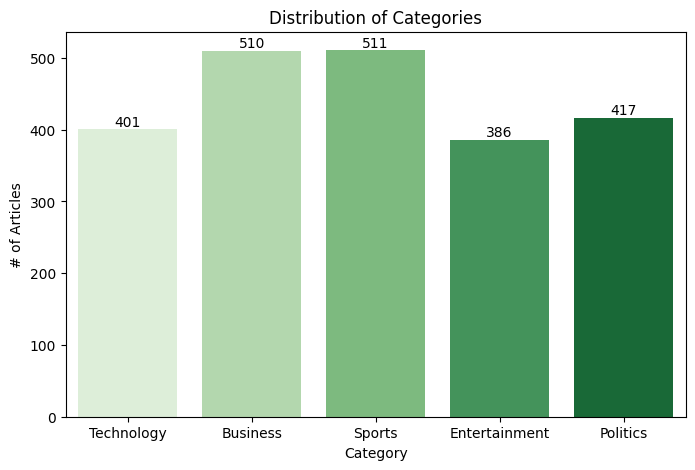

In [ ]:
draw_cntplot_categories(data_df)

In [13]:
stop_words = list(stopwords.words('english'))

In [14]:
def text_process(sent):
  # Remove non-characters
  sent = re.sub('[^a-zA-Z]', ' ', sent)

  # Tokenize the Text into Words
  words = nltk.word_tokenize(sent)

  # Remove the stop words
  filtered_sent = [w for w in words if not w in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  new_text = [lemmatizer.lemmatize(word) for word in filtered_sent]
  new_text = ' '.join(new_text)

  return new_text




In [15]:
data_df['Article'] = data_df['Article'].apply(text_process)

### Data Transformation

In [16]:
encode = ce.OrdinalEncoder(cols=['Category'])
data_df = encode.fit_transform(data_df)

In [17]:
display_unique_values(data_df)

*** Unique Values count of Categorical Variables ***

3    511
2    510
5    417
1    401
4    386 



####
We can get the user choice to select the technique for vectorizing the data -
* BoW
* TF-IDF

In [20]:
choice = int(input('Choose \n (1) for Bag of Words \n (2) for TF-IDF \n CHoice: '))

if choice == 1:
  cv = CountVectorizer(max_features=5000)
  X = cv.fit_transform(data_df.Article).toarray()
  y = np.array(data_df['Category'].values)
elif choice == 2:
  tf_idf = TfidfVectorizer()
  X = tf_idf.fit_transform(data_df.Article).toarray()
  y = np.array(data_df['Category'].values)
else:
  print('Give a valid input')

Choose 
 (1) for Bag of Words 
 (2) for TF-IDF 
 CHoice: 2


#### Segregate the Independent & Dependent variables

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

#### Shape of the train & test data

In [22]:
print("Number of rows in train set is {}".format(X_train.shape[0]))
print("Number of rows in test set is {}".format(X_val.shape[0]))

Number of rows in train set is 1668
Number of rows in test set is 557


### Build the Base Model

Naive Bayes Classifier

In [23]:
# Train the Model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [27]:
# Find out train & test accuracy
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Training Accuracy: {:.3f}".format(nb_train))
print("Test Accuracy: {:.3f}".format(nb_test))

Training Accuracy: 0.992
Test Accuracy: 0.971


In [28]:
# Make predictions on Test Set
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

In [30]:
# ROC AUC Score
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')))

ROC AUC Score: 0.998


In [31]:
# Precision, Re-call and F1 Score
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')

print("Precision Score: {:.3f}".format(precision))
print("Recall Score: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Precision Score: 0.972
Recall Score: 0.971
F1 Score: 0.971


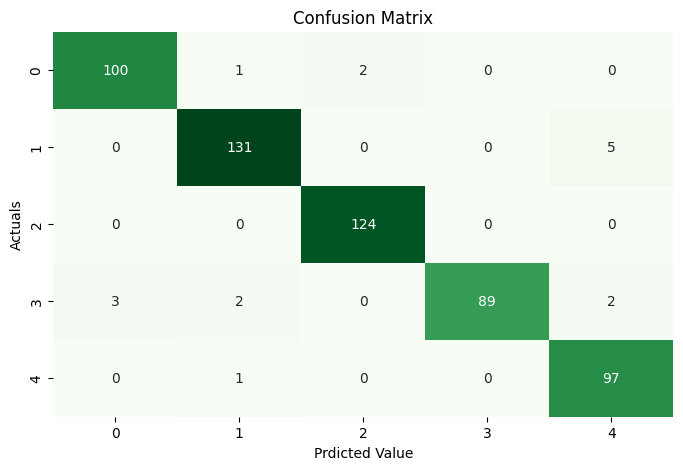

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel('Prdicted Value')
plt.ylabel('Actuals')
plt.show()

In [36]:
# Classification Report
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       103
           2       0.97      0.96      0.97       136
           3       0.98      1.00      0.99       124
           4       1.00      0.93      0.96        96
           5       0.93      0.99      0.96        98

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



## Helper Functions

#### Model Training

In [37]:
def model_train(obj):
  obj.fit(X_train, y_train)
  y_pred = obj.predict(X_val)
  y_pred_proba = obj.predict_proba(X_val)
  return y_pred, y_pred_proba

#### Model Evaluation

In [48]:
def model_eval(obj, y_pred, y_pred_proba):
  print("**************************************")

  # Train & Test accuracy
  train_acc = accuracy_score(y_train, obj.predict(X_train))
  test_acc = accuracy_score(y_val, obj.predict(X_val))

  print("Train Accuracy: {:.3f}".format(train_acc))
  print("Test Accuracy: {:.3f}".format(test_acc))

  # ROC AUC Score
  print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

  # Precision, Recall and f1_score
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')

  print("Precision: {:.3f}".format(precision))
  print('Recall: {:.3f}'.format(recall))
  print('F1 Score: {:.3f}'.format(f1))

  print("**************************************")

### Decision Tree Classifier Model

In [49]:
# Create the Model Object
dt = DecisionTreeClassifier()

# Train the model
y_pred_dt, y_pred_proba_dt = model_train(dt)

# Evaluate the model
model_eval(dt, y_pred_dt, y_pred_proba_dt)

**************************************
Train Accuracy: 1.000
Test Accuracy: 0.826
ROC AUC Score: 0.890
Precision: 0.829
Recall: 0.826
F1 Score: 0.826
**************************************


#### Nearest Neighbors Classifier

In [50]:
# Creating the model object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
y_pred_knn, y_pred_proba_knn = model_train(knn)

# Evalute the model
model_eval(knn, y_pred_knn, y_pred_proba_knn)

**************************************
Train Accuracy: 0.957
Test Accuracy: 0.937
ROC AUC Score: 0.990
Precision: 0.938
Recall: 0.937
F1 Score: 0.937
**************************************


### Random Forest Classifier

In [51]:
# Create the model
rf = RandomForestClassifier()

# Train the model
y_pred_rf, y_pred_proba_rf = model_train(rf)

# Evaluate the model
model_eval(rf, y_pred_rf, y_pred_proba_rf)

**************************************
Train Accuracy: 1.000
Test Accuracy: 0.950
ROC AUC Score: 0.997
Precision: 0.952
Recall: 0.950
F1 Score: 0.950
**************************************


**Observation**: *Out of all the models tested till now, Naive Bayes Classifier seems to be the best performing one since it gives good train & test accuracy, more than satisfactory precision & recall and almost non-significant overfitting.*